### Algomerative Clustering 

Going on by aggregating the data.

In [2]:
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets

warnings.filterwarnings('ignore')

In [4]:
iris = datasets.load_iris()
print(iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [8]:
## pca to improve reduce the dimension
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)

Text(0, 0.5, 'feature_2')

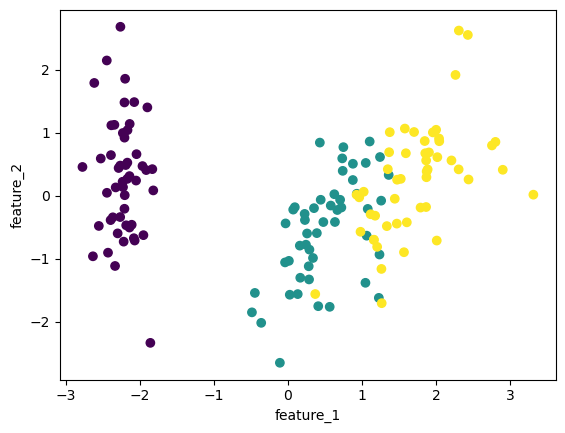

In [10]:
plt.scatter(X_scaled_pca[:,0],X_scaled_pca[:,1],c=iris['target'])
plt.xlabel("feature_1")
plt.ylabel("feature_2")

Text(0, 0.5, 'Euclidean Distance')

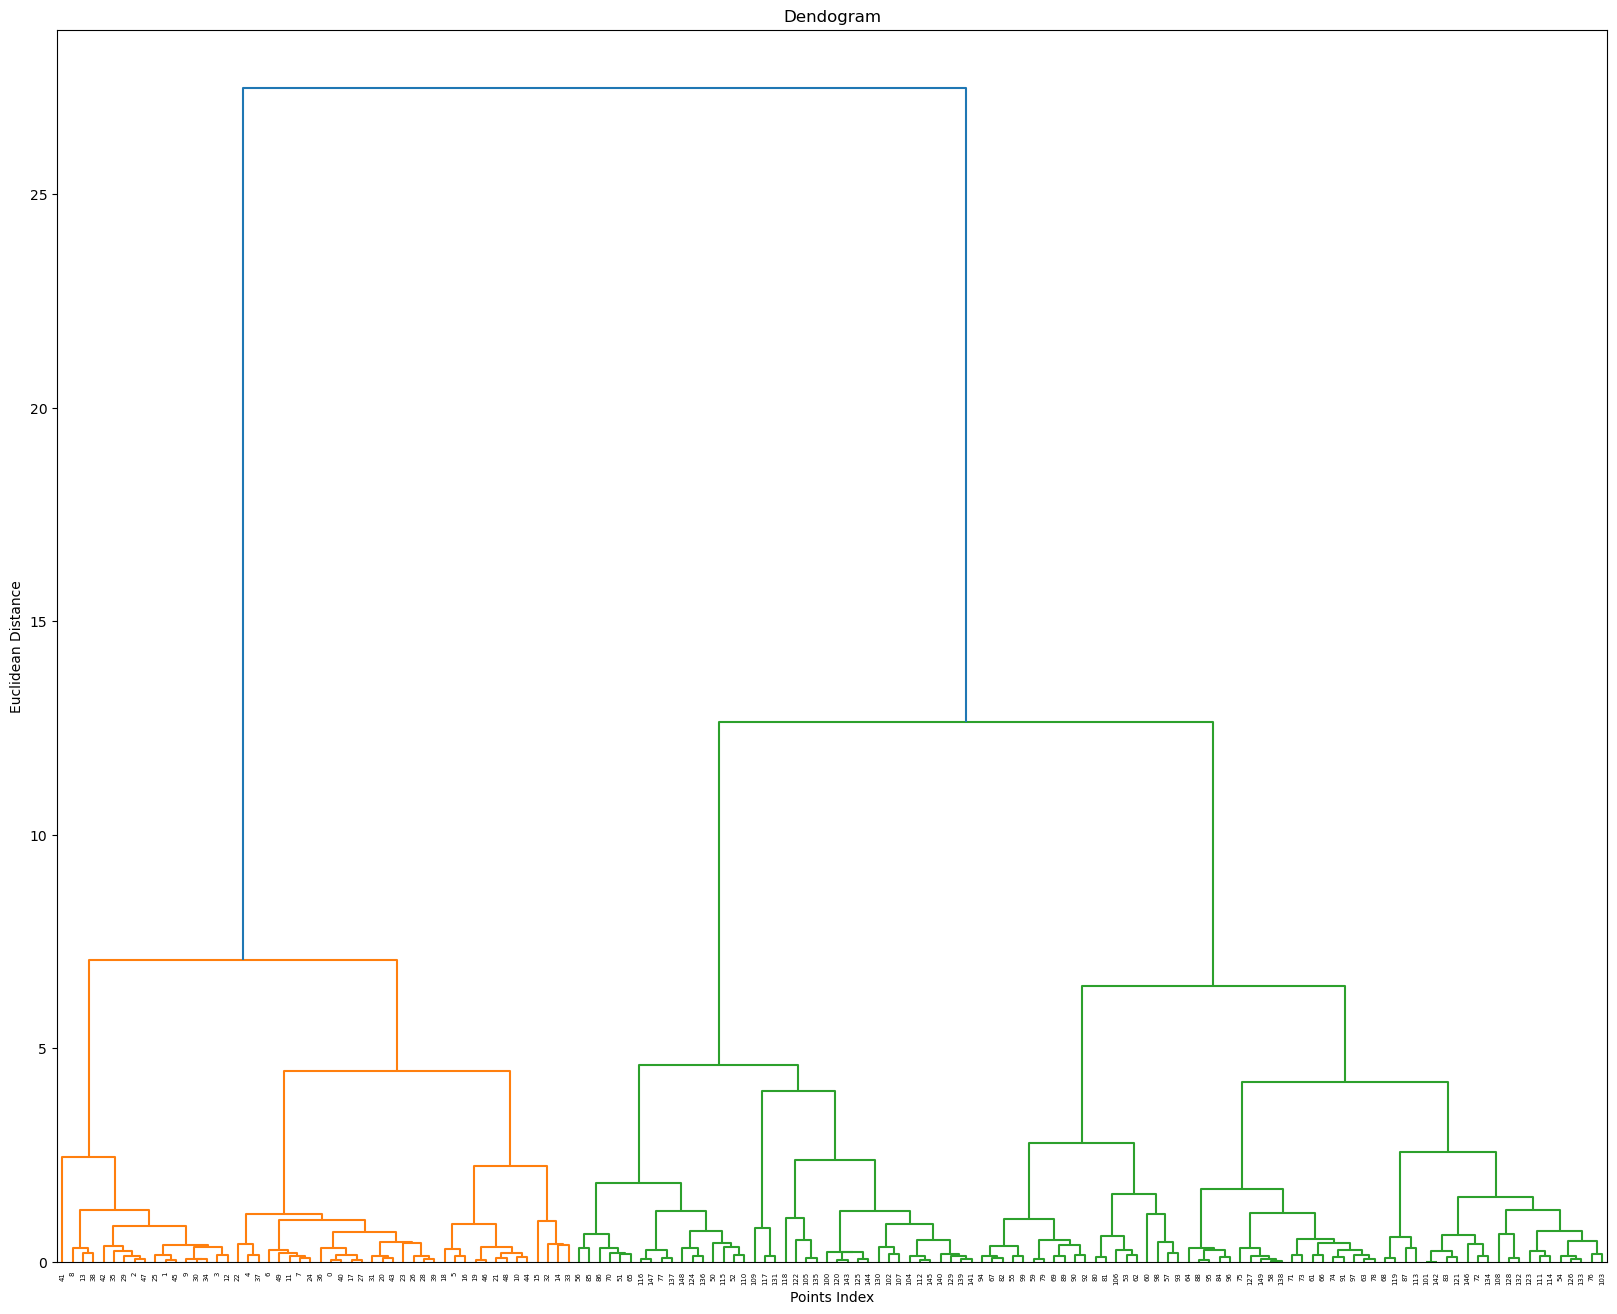

In [ ]:
### construct a dendogram to find the number of clusters 'K'
import scipy.cluster.hierarchy as sc 

plt.figure(figsize=(20,16))
plt.title("Dendogram")

sc.dendrogram(sc.linkage(X_scaled_pca,method='ward'))
plt.xlabel('Points Index')
plt.ylabel('Euclidean Distance')

In [16]:
from sklearn.cluster import AgglomerativeClustering 

cluster = AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage='ward')

cluster.fit(X_scaled_pca)

AgglomerativeClustering()

In [18]:
y_pred = cluster.labels_

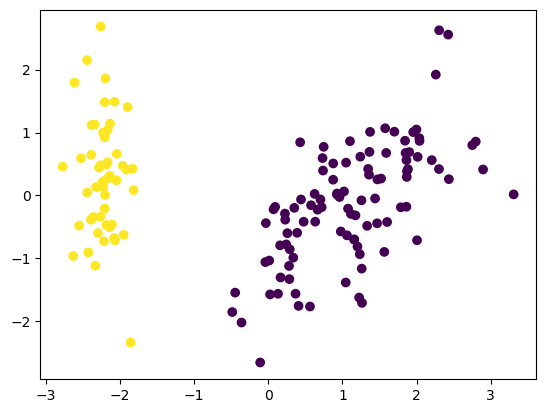

In [19]:
plt.scatter(X_scaled_pca[:,0],X_scaled_pca[:,1],c = y_pred)